In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
import cv2
import os

In [3]:
pip install albumentations --user

Note: you may need to restart the kernel to use updated packages.


ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.


# EDA

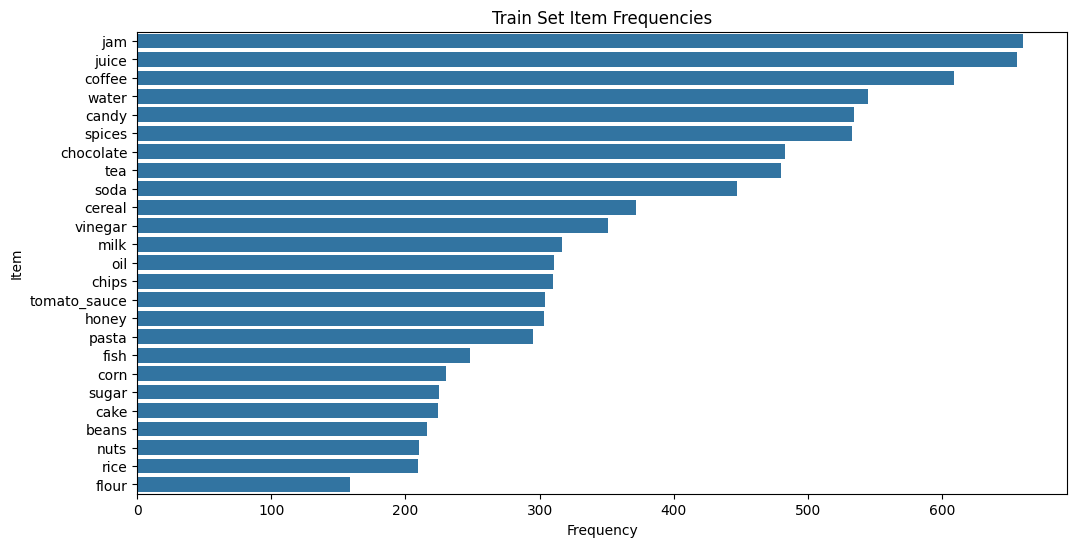

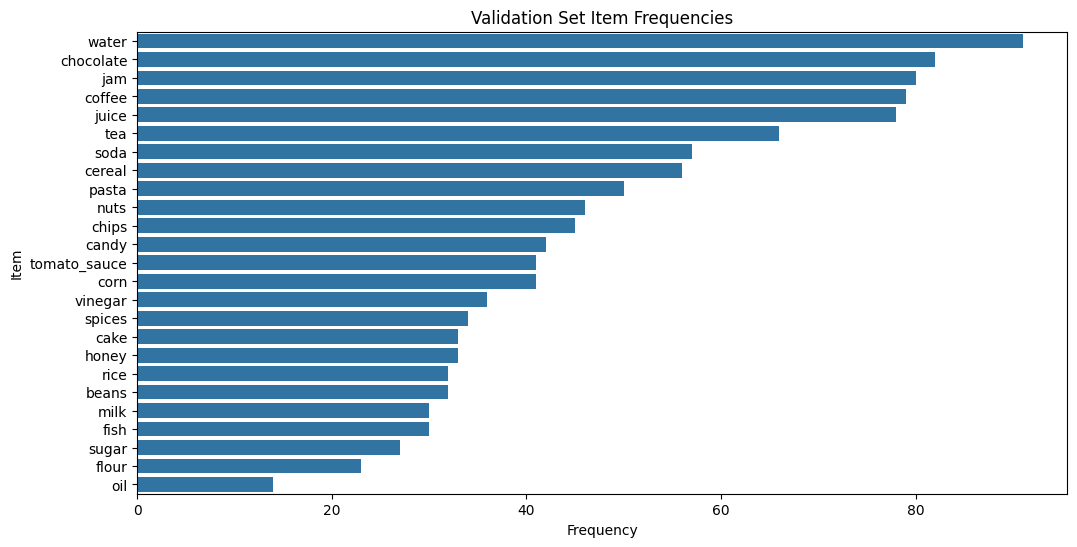

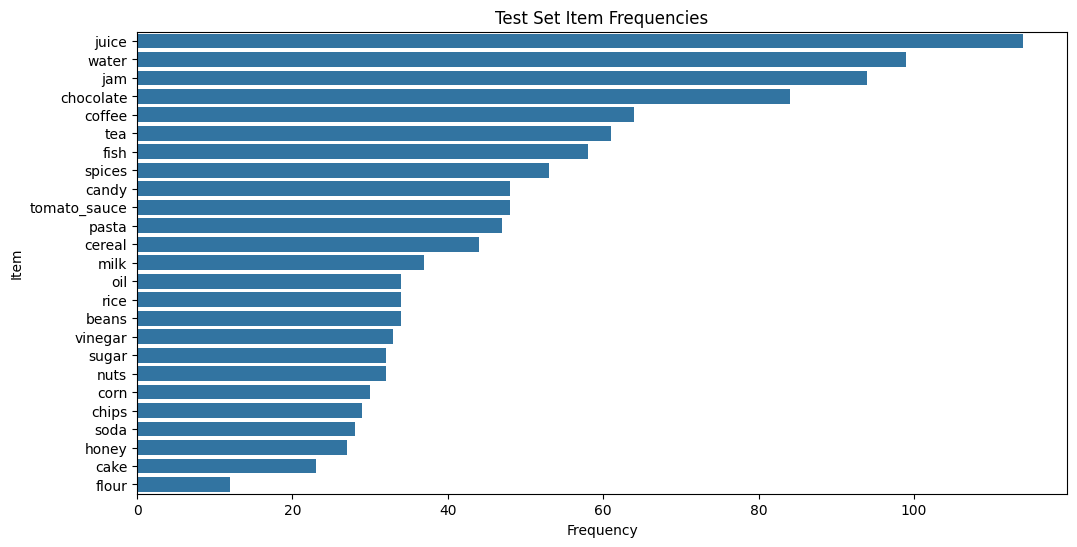

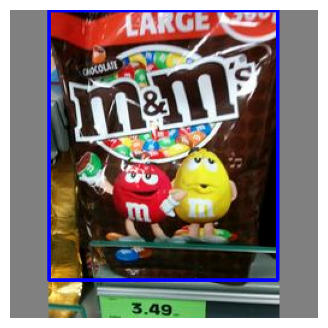

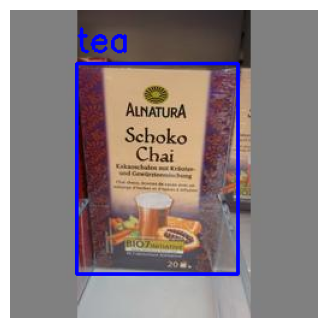

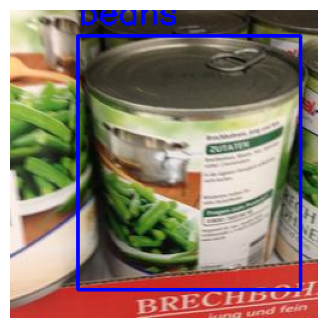

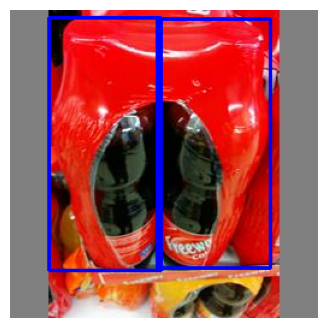

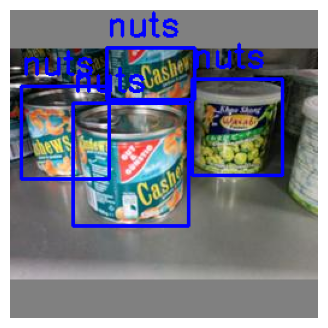

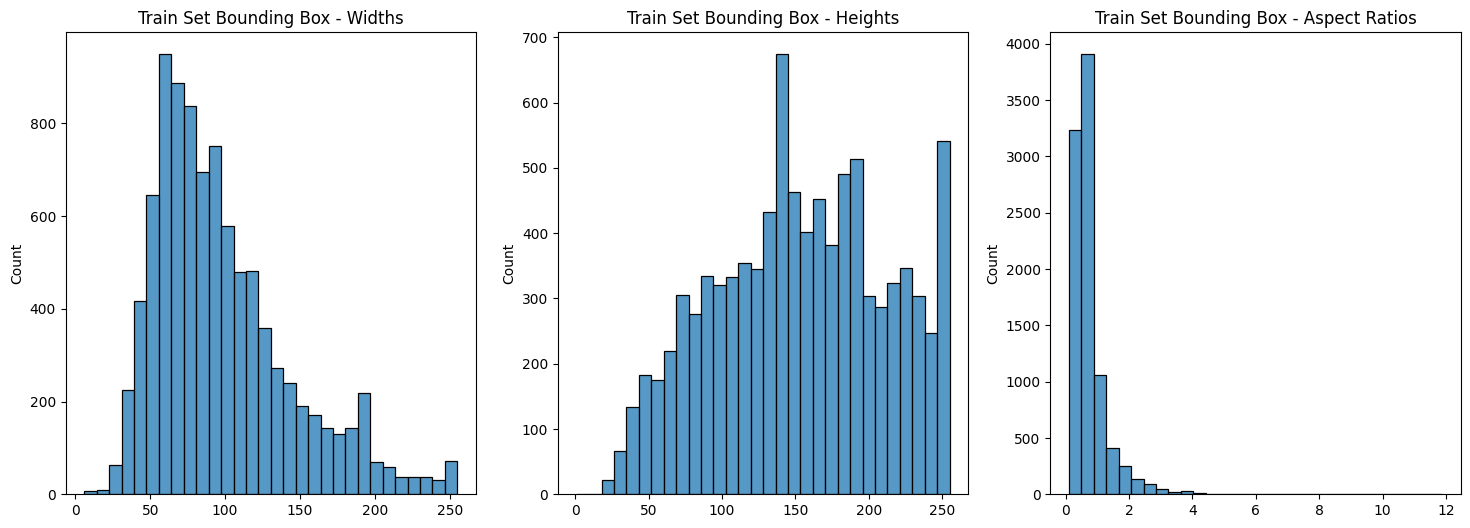

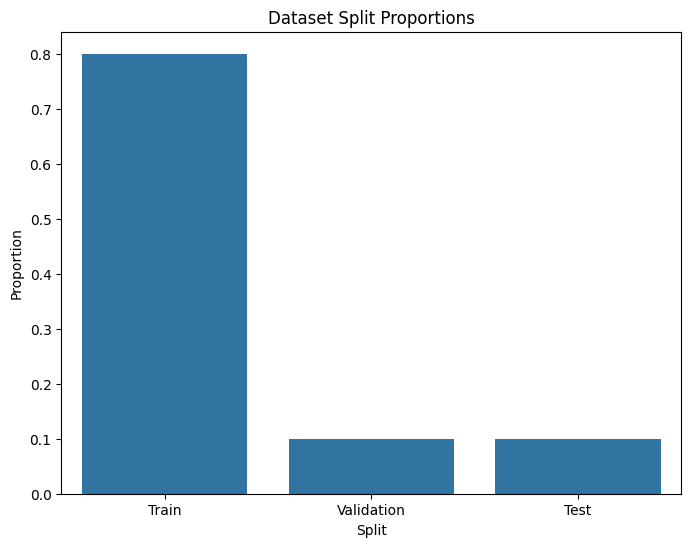

In [22]:
# Load COCO format annotations
def load_annotations(file_path):
    with open(file_path, 'r') as f:
        annotations = json.load(f)
    return annotations

# Load the annotations
train_annotations = load_annotations("C:\\Users\\Joon Park\\Desktop\\School\\UCHICAGO WORK\\ML\\final\\coco\\train\\train_annotations.coco.json")
val_annotations = load_annotations("C:\\Users\\Joon Park\\Desktop\\School\\UCHICAGO WORK\\ML\\final\\coco\\valid\\val_annotations.coco.json")
test_annotations = load_annotations("C:\\Users\\Joon Park\\Desktop\\School\\UCHICAGO WORK\\ML\\final\\coco\\test\\test_annotations.coco.json")

# Extract item frequencies
def get_item_frequencies(annotations):
    category_counts = Counter()
    for ann in annotations['annotations']:
        category_id = ann['category_id']
        category_counts[category_id] += 1
    return category_counts

train_item_freq = get_item_frequencies(train_annotations)
val_item_freq = get_item_frequencies(val_annotations)
test_item_freq = get_item_frequencies(test_annotations)

# Convert to DataFrame for easier plotting
def convert_to_dataframe(item_freq, annotations):
    categories = {cat['id']: cat['name'] for cat in annotations['categories']}
    data = {'Item': [categories[item] for item in item_freq.keys()],
            'Frequency': list(item_freq.values())}
    return pd.DataFrame(data)

train_df = convert_to_dataframe(train_item_freq, train_annotations)
val_df = convert_to_dataframe(val_item_freq, val_annotations)
test_df = convert_to_dataframe(test_item_freq, test_annotations)

# Plot item frequencies
def plot_item_frequencies(df, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Frequency', y='Item', data=df.sort_values('Frequency', ascending=False))
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Item')
    plt.show()

plot_item_frequencies(train_df, 'Train Set Item Frequencies')
plot_item_frequencies(val_df, 'Validation Set Item Frequencies')
plot_item_frequencies(test_df, 'Test Set Item Frequencies')

# Visualize sample images with annotations
def plot_sample_images(annotations, img_dir, num_samples=5):
    for img_info in annotations['images'][:num_samples]:
        img_path = os.path.join(img_dir, img_info['file_name'])
        img = cv2.imread(img_path)
        for ann in annotations['annotations']:
            if ann['image_id'] == img_info['id']:
                bbox = ann['bbox']
                x, y, w, h = map(int, bbox)
                cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
                category = next(cat['name'] for cat in annotations['categories'] if cat['id'] == ann['category_id'])
                cv2.putText(img, category, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
        plt.figure(figsize=(4, 4))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

plot_sample_images(train_annotations, "C:\\Users\\Joon Park\\Desktop\\School\\UCHICAGO WORK\\ML\\final\\coco\\train")

# Bounding box statistics
def get_bbox_statistics(annotations):
    widths = []
    heights = []
    aspect_ratios = []
    for ann in annotations['annotations']:
        _, _, w, h = ann['bbox']
        widths.append(w)
        heights.append(h)
        aspect_ratios.append(w / h)
    return widths, heights, aspect_ratios

train_widths, train_heights, train_aspect_ratios = get_bbox_statistics(train_annotations)

# Plot bounding box statistics
def plot_bbox_statistics(widths, heights, aspect_ratios, title):
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    sns.histplot(widths, bins=30)
    plt.title(f'{title} - Widths')

    plt.subplot(1, 3, 2)
    sns.histplot(heights, bins=30)
    plt.title(f'{title} - Heights')

    plt.subplot(1, 3, 3)
    sns.histplot(aspect_ratios, bins=30)
    plt.title(f'{title} - Aspect Ratios')

    plt.show()

plot_bbox_statistics(train_widths, train_heights, train_aspect_ratios, 'Train Set Bounding Box')

# Dataset split proportions
def get_split_proportions(train_ann, val_ann, test_ann):
    total_images = len(train_ann['images']) + len(val_ann['images']) + len(test_ann['images'])
    proportions = {
        'Train': len(train_ann['images']) / total_images,
        'Validation': len(val_ann['images']) / total_images,
        'Test': len(test_ann['images']) / total_images
    }
    return proportions

split_proportions = get_split_proportions(train_annotations, val_annotations, test_annotations)
split_df = pd.DataFrame(list(split_proportions.items()), columns=['Split', 'Proportion'])

plt.figure(figsize=(8, 6))
sns.barplot(x='Split', y='Proportion', data=split_df)
plt.title('Dataset Split Proportions')
plt.show()

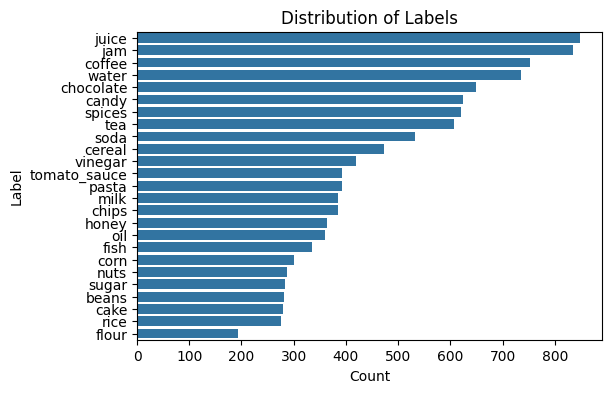

In [21]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from pathlib import Path

# Load COCO format annotations
def load_annotations(file_path):
    with open(file_path, 'r') as f:
        annotations = json.load(f)
    return annotations

# Extract labels from annotations
def extract_labels(annotations):
    labels = []
    for ann in annotations['annotations']:
        category_id = ann['category_id']
        labels.append(category_id)
    return labels

# Load annotations for all sets
train_annotations = load_annotations("C:\\Users\\Joon Park\\Desktop\\School\\UCHICAGO WORK\\ML\\final\\coco\\train\\train_annotations.coco.json")
val_annotations = load_annotations("C:\\Users\\Joon Park\\Desktop\\School\\UCHICAGO WORK\\ML\\final\\coco\\valid\\val_annotations.coco.json")
test_annotations = load_annotations("C:\\Users\\Joon Park\\Desktop\\School\\UCHICAGO WORK\\ML\\final\\coco\\test\\test_annotations.coco.json")


# Extract labels from all sets
train_labels = extract_labels(train_annotations)
val_labels = extract_labels(val_annotations)
test_labels = extract_labels(test_annotations)

# Combine all labels
all_labels = train_labels + val_labels + test_labels

# Count label occurrences
label_counts = Counter(all_labels)

# Convert to DataFrame for easier plotting
categories = {cat['id']: cat['name'] for cat in train_annotations['categories']}
label_data = {'Label': [categories[label] for label in label_counts.keys()],
              'Count': list(label_counts.values())}
label_df = pd.DataFrame(label_data)

# Plot label distribution
plt.figure(figsize=(6, 4))
sns.barplot(x='Count', y='Label', data=label_df.sort_values('Count', ascending=False))
plt.title('Distribution of Labels')
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()


## Image Resolution Analysis

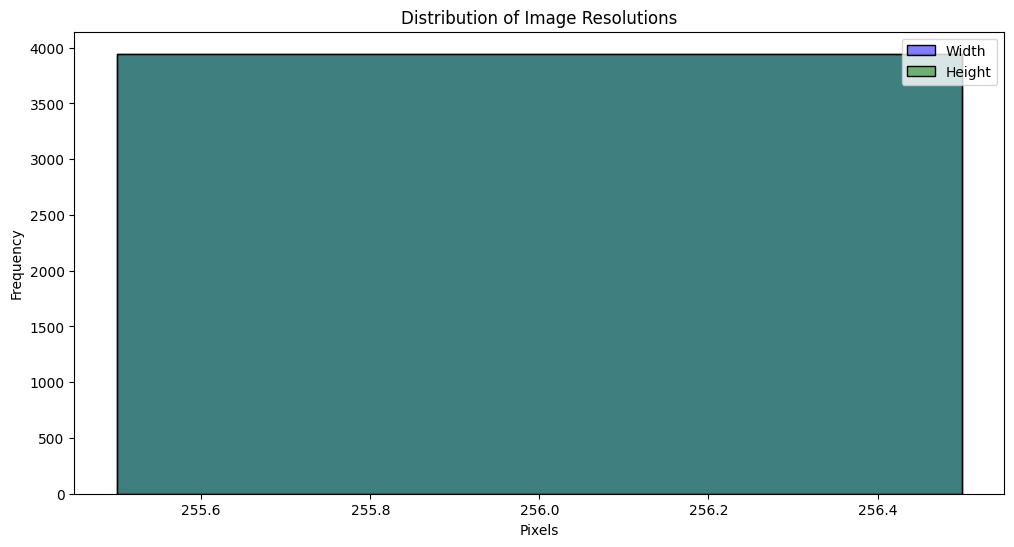

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pathlib import Path

def get_image_resolutions(annotations, img_dir):
    img_dir = Path(img_dir)
    resolutions = []
    
    for img_info in annotations['images']:
        img_path = img_dir / img_info['file_name']
        
        if not img_path.exists():
            print(f"Image not found: {img_path}")
            continue
        
        img = cv2.imread(str(img_path))
        
        if img is None:
            print(f"Failed to load image: {img_path}")
            continue
        
        height, width = img.shape[:2]
        resolutions.append((width, height))
    
    return resolutions

def plot_image_resolutions(resolutions):
    widths, heights = zip(*resolutions)
    
    plt.figure(figsize=(12, 6))
    sns.histplot(widths, kde=True, color='blue', label='Width', alpha=0.5)
    sns.histplot(heights, kde=True, color='green', label='Height', alpha=0.5)
    plt.legend()
    plt.title('Distribution of Image Resolutions')
    plt.xlabel('Pixels')
    plt.ylabel('Frequency')
    plt.show()

# Example usage
train_img_dir = "C:\\Users\\Joon Park\\Desktop\\School\\UCHICAGO WORK\\ML\\final\\coco\\train"
resolutions = get_image_resolutions(train_annotations, train_img_dir)
plot_image_resolutions(resolutions)


## Color Channel Analysis

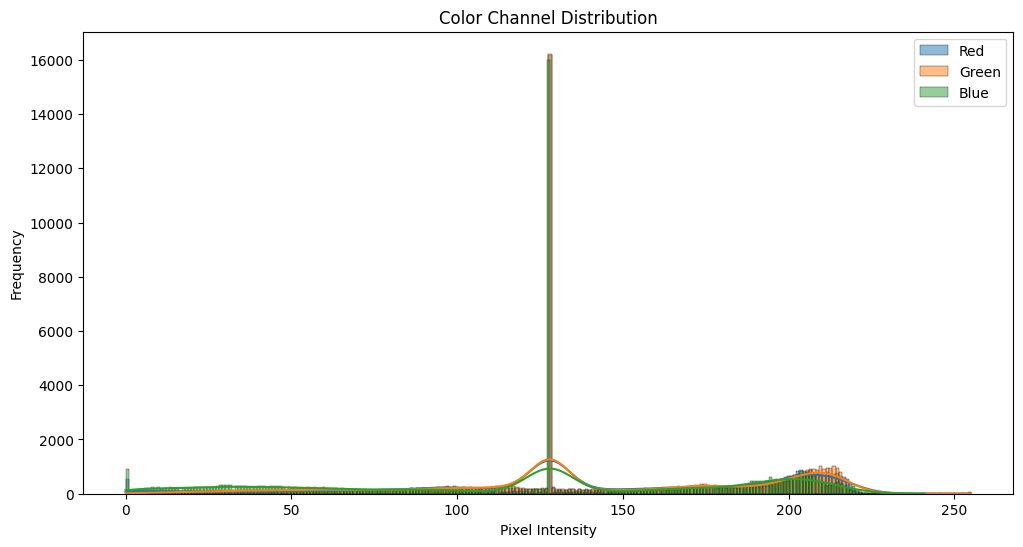

In [25]:
def plot_color_channel_distribution(img_dir, num_samples=100):
    img_dir = Path(img_dir)
    color_distributions = {'Red': [], 'Green': [], 'Blue': []}
    
    for img_path in img_dir.iterdir():
        if img_path.suffix.lower() not in ['.jpg', '.jpeg', '.png']:
            continue
        
        img = cv2.imread(str(img_path))
        
        if img is None:
            print(f"Failed to load image: {img_path}")
            continue
        
        b, g, r = cv2.split(img)
        color_distributions['Red'].extend(r.flatten())
        color_distributions['Green'].extend(g.flatten())
        color_distributions['Blue'].extend(b.flatten())
        
        if len(color_distributions['Red']) >= num_samples:
            break
    
    plt.figure(figsize=(12, 6))
    for color, distribution in color_distributions.items():
        sns.histplot(distribution, kde=True, bins=256, label=color, alpha=0.5)
    
    plt.legend()
    plt.title('Color Channel Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Example usage
plot_color_channel_distribution(train_img_dir)


## Aspect Ratio

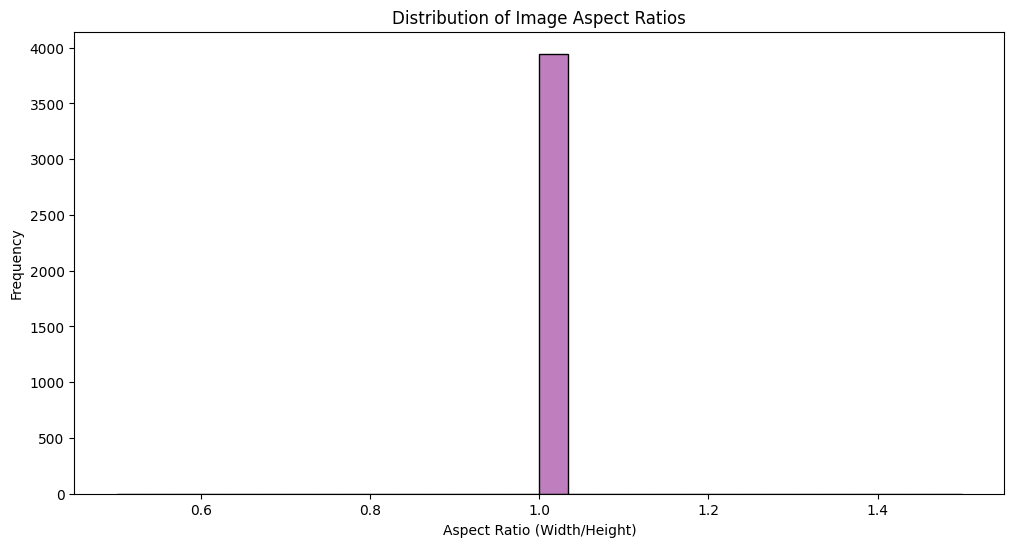

In [26]:
def plot_aspect_ratio_distribution(resolutions):
    aspect_ratios = [width / height for width, height in resolutions]
    
    plt.figure(figsize=(12, 6))
    sns.histplot(aspect_ratios, kde=True, bins=30, color='purple')
    plt.title('Distribution of Image Aspect Ratios')
    plt.xlabel('Aspect Ratio (Width/Height)')
    plt.ylabel('Frequency')
    plt.show()

# Example usage
plot_aspect_ratio_distribution(resolutions)


## Annotation Density

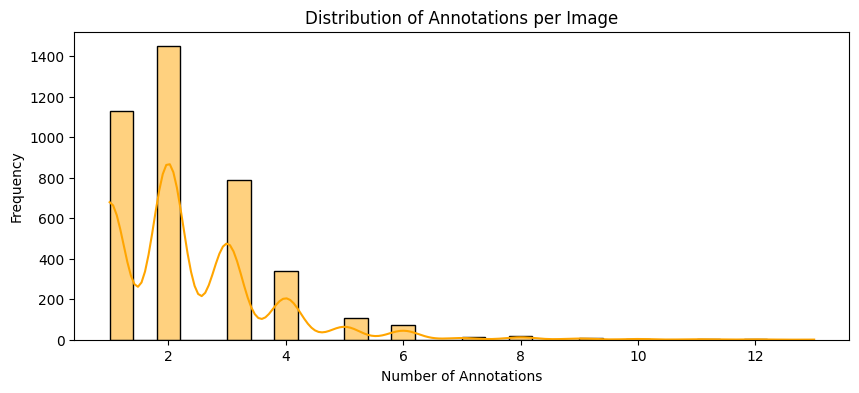

In [30]:
def plot_annotation_density(annotations):
    annotation_counts = Counter([ann['image_id'] for ann in annotations['annotations']])
    
    plt.figure(figsize=(10, 4))
    sns.histplot(list(annotation_counts.values()), kde=True, bins=30, color='orange')
    plt.title('Distribution of Annotations per Image')
    plt.xlabel('Number of Annotations')
    plt.ylabel('Frequency')
    plt.show()

# Example usage
plot_annotation_density(train_annotations)


## Bounding Box Analysis

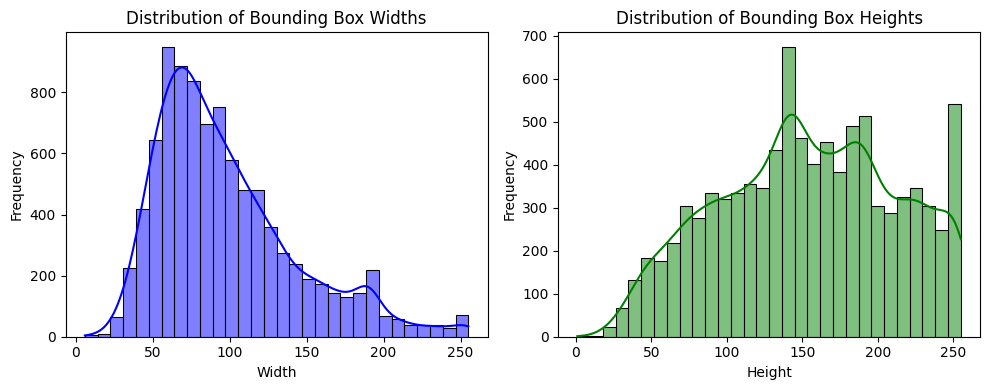

In [29]:
def plot_bounding_box_sizes(annotations):
    widths = []
    heights = []
    
    for ann in annotations['annotations']:
        _, _, width, height = ann['bbox']
        widths.append(width)
        heights.append(height)
    
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(widths, kde=True, bins=30, color='blue')
    plt.title('Distribution of Bounding Box Widths')
    plt.xlabel('Width')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.histplot(heights, kde=True, bins=30, color='green')
    plt.title('Distribution of Bounding Box Heights')
    plt.xlabel('Height')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_bounding_box_sizes(train_annotations)


# Visualizing Data Augmentations

In [2]:
# This part of code was ran by Google Colab
import json
import cv2
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt

def visualize(image, bboxes=None, title=""):
    fig, ax = plt.subplots(1, figsize=(12, 12))
    if bboxes is not None:
        for bbox in bboxes:
            x_min, y_min, w, h = bbox
            x_max = x_min + w
            y_max = y_min + h
            cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (255, 0, 0), 2)
    ax.imshow(image)
    ax.set_title(title)
    plt.show()

def apply_augmentations(image, bboxes, category_ids):
    transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.5, rotate_limit=0, p=1.0),
        A.RGBShift(p=0.5),
        A.RandomSizedBBoxSafeCrop(height=300, width=300, p=0.5),
        A.HueSaturationValue(hue_shift_limit=0.015, sat_shift_limit=0.7, val_shift_limit=0.4, p=1.0),
    ], bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']))
    
    transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
    return transformed['image'], transformed['bboxes']

def load_coco_annotations(annotation_path):
    with open(annotation_path, 'r') as f:
        annotations = json.load(f)
    return annotations

def get_image_annotations(image_id, annotations):
    bboxes = []
    category_ids = []
    for ann in annotations['annotations']:
        if ann['image_id'] == image_id:
            bboxes.append(ann['bbox'])
            category_ids.append(ann['category_id'])
    return bboxes, category_ids

# Example usage
image_path = "/coco2/coco/train/CANDY0165_png.rf.4c5ec27dc14fe59ab50bed385d355557.jpg"
annotation_path = "/coco2/coco/train/train_annotations.coco.json"  # Path to your COCO annotation file

# Load the image
image = cv2.imread(image_path)
if image is None:
    print(f"Error: Failed to load image at {image_path}")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Load annotations
    annotations = load_coco_annotations(annotation_path)
    
    # Get the image ID from the file name
    image_id = None
    for img in annotations['images']:
        if img['file_name'] == image_path.split('/')[-1]:
            image_id = img['id']
            break
    
    if image_id is None:
        print(f"Error: Image ID not found for {image_path}")
    else:
        # Get bounding boxes and category IDs for the image
        bboxes, category_ids = get_image_annotations(image_id, annotations)

        # Visualize original image with bounding boxes
        visualize(image, bboxes, title="Original Image")

        # Apply augmentations
        augmented_image, augmented_bboxes = apply_augmentations(image, bboxes, category_ids)

        # Visualize augmented image with bounding boxes
        visualize(augmented_image, augmented_bboxes, title="Augmented Image")


ModuleNotFoundError: No module named 'albumentations'

# Evaluation 

In [18]:
loss_df = pd.read_csv("C:\\Users\\Joon Park\\Desktop\\School\\UCHICAGO WORK\\ML\\final\\yolov5\\runs\\train\\exp11\\results.csv")
loss_df.head()

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.075402,0.022706,0.082091,0.061253,0.19927,0.060633,0.031612,0.043444,0.013312,0.079157,0.070121,0.003320,0.003320
1,1,0.045136,0.016990,0.077138,0.308810,0.19577,0.096613,0.062228,0.033804,0.010851,0.074731,0.040056,0.006587,0.006587
2,2,0.040971,0.015325,0.073005,0.284060,0.27136,0.135270,0.084599,0.030575,0.010189,0.069561,0.009924,0.009789,0.009789
3,3,0.037515,0.014620,0.068230,0.238620,0.39024,0.209040,0.139210,0.028267,0.010119,0.065137,0.009703,0.009703,0.009703
4,4,0.034049,0.014167,0.064765,0.405160,0.34325,0.267690,0.174890,0.029997,0.010652,0.061196,0.009703,0.009703,0.009703


In [19]:
loss_df.columns

Index(['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss',
       'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5',
       'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss',
       'x/lr0', 'x/lr1', 'x/lr2'],
      dtype='object')

In [24]:
def plot_loss(train_loss, val_loss):
    # Plotting
    plt.figure(figsize=(8, 4))
    plt.plot(loss_df['epoch'], loss_df[train_loss], label= train_loss)
    plt.plot(loss_df['epoch'], loss_df[val_loss], label=val_loss)

    # Adding titles and labels
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


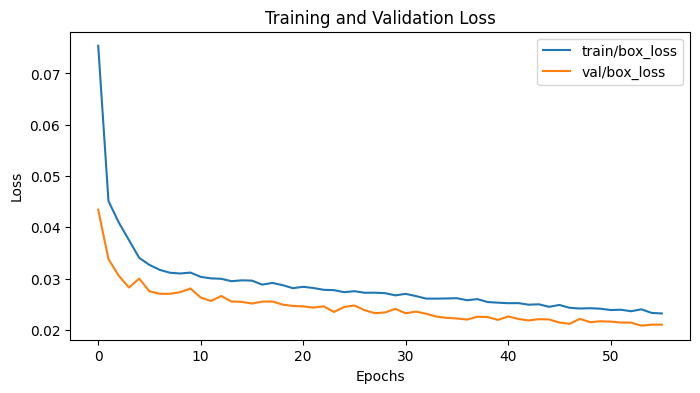

In [25]:
plot_loss('train/box_loss', 'val/box_loss')

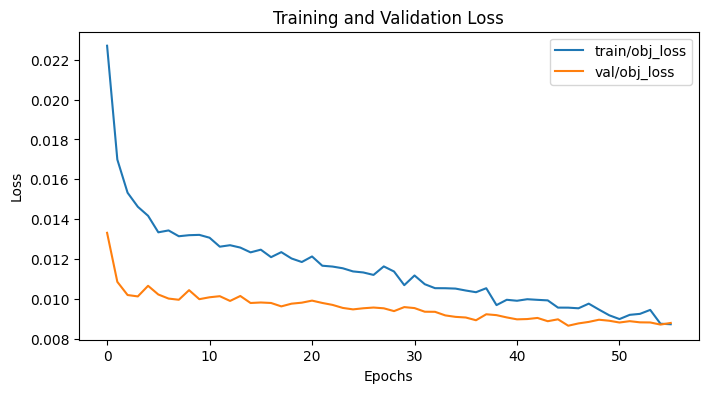

In [26]:
plot_loss('train/obj_loss', 'val/obj_loss')

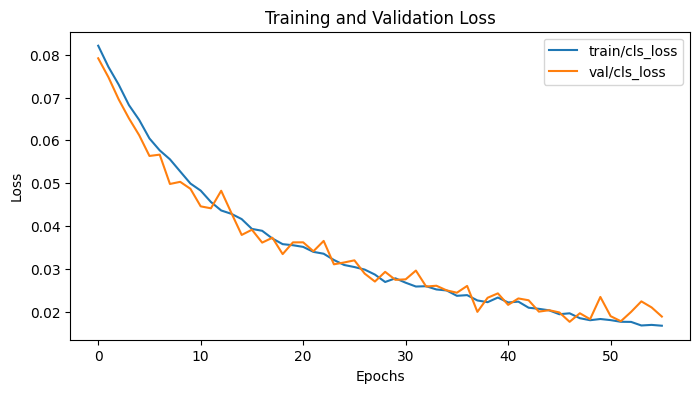

In [27]:
plot_loss('train/cls_loss', 'val/cls_loss')